# Predicting

### Creating a dataset with only counties, years and months.

Removed the building type and cause columns to make the predicting more accurate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_df = pd.read_csv("hoonetulekahjud.csv")
data = data_df.values
data_df.head()

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2


In [2]:
def dataset_with_counties_years_months(data):
    array = []
    for i in data:
        for j in range(i[5]):
            array.append([i[0], i[1], i[4]])
    return array
dataframe = pd.DataFrame((dataset_with_counties_years_months(data)), columns=['Maakond', 'Aasta','Kuu'])
dataframe['Hoonetulekahjud']=dataframe.groupby(by=['Maakond','Aasta', 'Kuu'])['Maakond'].transform('count')
dataframe = dataframe.drop_duplicates()

dataframe.head()

,Maakond,Aasta,Kuu,Hoonetulekahjud
0,Valga maakond,2014,3,1
1,Tartu maakond,2014,3,3
4,Rapla maakond,2014,3,1
5,Lääne maakond,2014,3,1
6,Harju maakond,2014,3,2



### Splitting the data into training and test data.


In [4]:
import sklearn
from sklearn.model_selection import train_test_split
data_single = []
data_copy = data.copy()
for i in data_copy:
    for j in range(i[5]):
        i[5] = 1
        data_single.append(i)
single = pd.DataFrame(data=data_df, columns=['Maakond', 'Aasta', 'Hoone liik', 'Tekkepõhjus',
                                            'Kuu', 'Hoonetulekahjud'])
data_dum = pd.get_dummies(data_df, columns=['Maakond', 'Hoone liik', 
                                                                  'Tekkepõhjus'])
                                                    
test, train = sklearn.model_selection.train_test_split(data_dum, train_size=0.7)
X_train = train.drop(columns=['Hoonetulekahjud'])
y_train = train['Hoonetulekahjud']
X_test = test.drop(columns=['Hoonetulekahjud'])
y_test = test['Hoonetulekahjud']

### Creating a dataset with only counties and months (not including the years). Majority class classifier.



In [5]:
def dataset_with_counties_months(data):
    array = []
    for i in data:
        for j in range(i[5]):
            array.append([i[0], i[4]])
    return array
dataframe = pd.DataFrame((dataset_with_counties_months(data)), columns=['Maakond', 'Kuu'])
dataframe['Hoonetulekahjud']=dataframe.groupby(by=['Maakond', 'Kuu'])['Maakond'].transform('count')
#dataframe = dataframe.drop_duplicates()

uusdata = dataframe.values
aastatega = []
loendur = 1
eelminemaakond = ""
eelminekuu = 0
eelminecount = 0
for rida in uusdata:
    #print(rida[2])
    if rida[0] == eelminemaakond and rida[2]==eelminecount:
        loendur = loendur + 1
        
    else:
        aastatega.append([eelminemaakond, eelminekuu, rida[2]/loendur])
        eelminemaakond = rida[0]
        eelminekuu = rida[1]
        eelminecount = rida[2]
        loendur = 1

    
#print(aastatega)
#print(dataframe)

In [6]:
def dataset_with_counties_months(X_train, y_train):
    array = []
    for i in X_train:
        for j in range(y_train):
            array.append([i[0], i[2]])
    return array

dataX = X_train.values
dataY = y_train.values
#dataframe_counties_months = pd.DataFrame((dataset_with_counties_months(dataX, dataY)), columns=['Maakond','Kuu'])

#dataframe_counties_months['Hoonetulekahjud']=dataframe_counties_months.groupby(by=['Maakond', 'Kuu'])['Maakond'].transform('count')
#dataframe_counties_months['Hoonetulekahjud']=dataframe_counties_months.groupby(by=['Maakond', 'Kuu'])['Maakond'].transform('count')
#dataframe_counties_months = dataframe_counties_months.drop_duplicates()
#dataframe_counties_months

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

data_single = []
data_copy = data.copy()
for i in data_copy:
    for j in range(i[5]):
        i[5] = 1
        data_single.append(i)
single = pd.DataFrame(data=data_df, columns=['Maakond', 'Aasta', 'Hoone liik', 'Tekkepõhjus',
                                             'Kuu', 'Hoonetulekahjud'])
single.head()

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2


In [35]:
data_dum = pd.get_dummies(single, columns=['Maakond', 'Hoone liik', 
                                                                  'Tekkepõhjus'])
test, train = sklearn.model_selection.train_test_split(data_dum, train_size=0.7)
X_train = train.drop(columns=['Hoonetulekahjud'],axis=1)
y_train = train['Hoonetulekahjud']
X_test = test.drop(columns=['Hoonetulekahjud'])
y_test = test['Hoonetulekahjud']


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
train_X, test_X,train_y, test_y = train_test_split(X_train, y_train,random_state=100, 
                                                   test_size = 0.3)

rf = RandomForestRegressor(criterion='mse',max_depth=6,n_estimators=200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [37]:
from sklearn.metrics import make_scorer, mean_squared_error
def RMSE(true_y, pred):
    return np.sqrt(mean_squared_error(true_y, pred))
rmse_scorer = make_scorer(RMSE, greater_is_better=False)

In [33]:
RMSE(rf.predict(X_train),y_train)

0.7740619014126187

In [34]:
RMSE(rf.predict(X_test),y_test)

1.2247108601026009

In [39]:
#pred = rf.predict(test)

## KNN and Decision Tree Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results_df = pd.DataFrame(columns=['model', 'accuracy'])

# TODO: uncomment and fill in

model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '12-NN', 'accuracy': acc }, ignore_index=True)
results_df
#print out the dataframe

,model,accuracy
0,12-NN,0.729887


In [22]:
for i in range(18, 24, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931


In [23]:
model = KNeighborsClassifier(n_neighbors = 12, metric='manhattan')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': '12-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
for i in range(18, 24, 2):
    model = KNeighborsClassifier(n_neighbors = i, metric='manhattan')
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results_df = results_df.append({'model': str(i)+'-NN, metric=manhattan', 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931
4,"12-NN, metric=manhattan",0.728878
5,"18-NN, metric=manhattan",0.733165
6,"20-NN, metric=manhattan",0.734678
7,"22-NN, metric=manhattan",0.735183


In [24]:
results_df.sort_values(['accuracy'], ascending=False) 

,model,accuracy
7,"22-NN, metric=manhattan",0.735183
3,22-NN,0.734931
6,"20-NN, metric=manhattan",0.734678
2,20-NN,0.733670
5,"18-NN, metric=manhattan",0.733165
1,18-NN,0.732913
0,12-NN,0.729887
4,"12-NN, metric=manhattan",0.728878


In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3a' , 'accuracy': acc }, ignore_index=True)
results_df
# TODO

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931
4,"12-NN, metric=manhattan",0.728878
5,"18-NN, metric=manhattan",0.733165
6,"20-NN, metric=manhattan",0.734678
7,"22-NN, metric=manhattan",0.735183
8,Model 3a,0.630013


In [26]:
model = tree.DecisionTreeClassifier(random_state = 3)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3b' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931
4,"12-NN, metric=manhattan",0.728878
5,"18-NN, metric=manhattan",0.733165
6,"20-NN, metric=manhattan",0.734678
7,"22-NN, metric=manhattan",0.735183
8,Model 3a,0.630013
9,Model 3b,0.626734


In [27]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy')
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3d' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931
4,"12-NN, metric=manhattan",0.728878
5,"18-NN, metric=manhattan",0.733165
6,"20-NN, metric=manhattan",0.734678
7,"22-NN, metric=manhattan",0.735183
8,Model 3a,0.630013
9,Model 3b,0.626734


In [28]:
model = tree.DecisionTreeClassifier(random_state = 0, criterion='entropy', min_samples_leaf = 10)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))
results_df = results_df.append({'model': 'Model 3e' , 'accuracy': acc }, ignore_index=True)
results_df

,model,accuracy
0,12-NN,0.729887
1,18-NN,0.732913
2,20-NN,0.733670
3,22-NN,0.734931
4,"12-NN, metric=manhattan",0.728878
5,"18-NN, metric=manhattan",0.733165
6,"20-NN, metric=manhattan",0.734678
7,"22-NN, metric=manhattan",0.735183
8,Model 3a,0.630013
9,Model 3b,0.626734


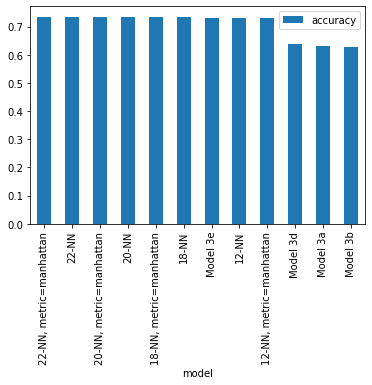

In [29]:
 results_df.sort_values(['accuracy'], ascending=False).plot(kind='bar', x='model', y='accuracy')
plt.show()

In [30]:
#Highest accuracy
#Can't get any results with it
results_df.sort_values(['accuracy'], ascending=False).head(1)

,model,accuracy
7,"22-NN, metric=manhattan",0.735183
